In [ ]:
# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms
import numpy as np

from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Analyzing the DATASET

In [ ]:
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


Data preprocessing - convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

In [ ]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
#normalizing
train_X = train_X / 255.
test_X = test_X / 255.

#one hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

#data splitting
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=123)

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [ ]:
from tensorflow import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import ReLU

from tensorflow.keras import layers
from tensorflow.keras import activations


In [ ]:
batch_size = 64
epochs = 10
num_classes = 10

In [ ]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(layers.Activation(activations.relu))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))

#fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#fashion_model.add(layers.Activation(activations.relu))
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(layers.Activation(activations.relu))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(layers.Activation(activations.relu))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_21 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 128)       36992     
                                                                 
 activation_22 (Activation)  (None, 14, 14, 128)       0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/10
750/750 [==============================] - 89s 118ms/step - loss: 0.4368 - accuracy: 0.8431 - val_loss: 0.3335 - val_accuracy: 0.8826
Epoch 2/10
750/750 [==============================] - 86s 115ms/step - loss: 0.2805 - accuracy: 0.8994 - val_loss: 0.2701 - val_accuracy: 0.9008
Epoch 3/10
750/750 [==============================] - 86s 115ms/step - loss: 0.2352 - accuracy: 0.9136 - val_loss: 0.2557 - val_accuracy: 0.9036
Epoch 4/10
750/750 [==============================] - 86s 114ms/step - loss: 0.1986 - accuracy: 0.9270 - val_loss: 0.2273 - val_accuracy: 0.9221
Epoch 5/10
750/750 [==============================] - 85s 114ms/step - loss: 0.1753 - accuracy: 0.9363 - val_loss: 0.2370 - val_accuracy: 0.9178
Epoch 6/10
750/750 [==============================] - 86s 114ms/step - loss: 0.1496 - accuracy: 0.9453 - val_loss: 0.2256 - val_accuracy: 0.9203
Epoch 7/10
750/750 [==============================] - 85s 114ms/step - loss: 0.1280 - accuracy: 0.9532 - val_loss: 0.2328 - val_ac

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.27907198667526245
Test accuracy: 0.9187999963760376


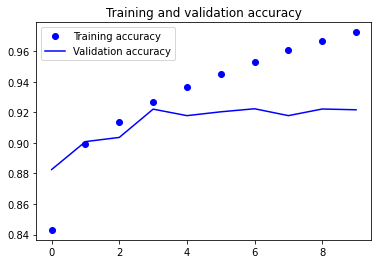

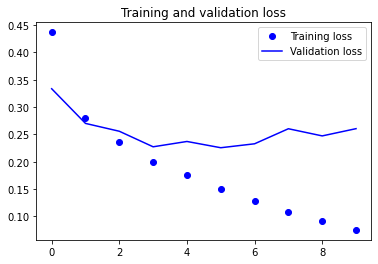

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above two plots, you can see that the validation accuracy almost became stagnant after 3 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

With this in mind, it's time to introduce some dropout into our model and see if it helps in reducing overfitting.

In [ ]:
fashion_model2 = Sequential()

fashion_model2.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model2.add(layers.Activation(activations.relu))
fashion_model2.add(MaxPooling2D((2, 2),padding='same'))
fashion_model2.add(Dropout(0.25))
#fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#fashion_model.add(layers.Activation(activations.relu))
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model2.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model2.add(layers.Activation(activations.relu))                  
fashion_model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model2.add(Dropout(0.25))

fashion_model2.add(Flatten())
fashion_model2.add(Dense(128, activation='linear'))
fashion_model2.add(layers.Activation(activations.relu))  
fashion_model2.add(Dropout(0.3))                
fashion_model2.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_24 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 128)       36992     
                                                                 
 activation_25 (Activation)  (None, 14, 14, 128)       0         
                                                     

In [ ]:
fashion_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_train_dropout = fashion_model2.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/10
750/750 [==============================] - 93s 122ms/step - loss: 0.5450 - accuracy: 0.8037 - val_loss: 0.3499 - val_accuracy: 0.8766
Epoch 2/10
750/750 [==============================] - 87s 116ms/step - loss: 0.3576 - accuracy: 0.8710 - val_loss: 0.3058 - val_accuracy: 0.8915
Epoch 3/10
750/750 [==============================] - 85s 114ms/step - loss: 0.3086 - accuracy: 0.8893 - val_loss: 0.2668 - val_accuracy: 0.9038
Epoch 4/10
750/750 [==============================] - 85s 114ms/step - loss: 0.2836 - accuracy: 0.8950 - val_loss: 0.2605 - val_accuracy: 0.9043
Epoch 5/10
750/750 [==============================] - 88s 117ms/step - loss: 0.2627 - accuracy: 0.9029 - val_loss: 0.2398 - val_accuracy: 0.9108
Epoch 6/10
750/750 [==============================] - 85s 114ms/step - loss: 0.2449 - accuracy: 0.9095 - val_loss: 0.2406 - val_accuracy: 0.9115
Epoch 7/10
750/750 [==============================] - 85s 113ms/step - loss: 0.2294 - accuracy: 0.9143 - val_loss: 0.2303 - val_ac

In [ ]:
fashion_model2.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [ ]:
test_eval2 = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval2[0])
print('Test accuracy:', test_eval2[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.2242 - accuracy: 0.9161
Test loss: 0.22419843077659607
Test accuracy: 0.916100025177002


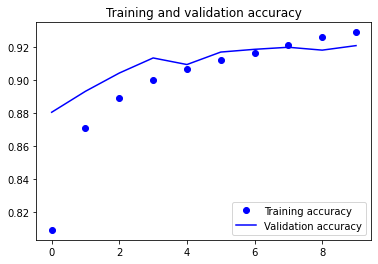

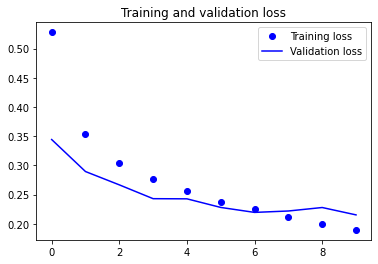

In [ ]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')e
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
fashion_model3 = Sequential()

fashion_model3.add(Conv2D(32, kernel_size=(5, 5),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model3.add(layers.Activation(activations.relu))
fashion_model3.add(MaxPooling2D((3, 3),padding='same'))
fashion_model3.add(Dropout(0.25))
#fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#fashion_model.add(layers.Activation(activations.relu))
#fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model3.add(Conv2D(128, (5, 5), activation='linear',padding='same'))
fashion_model3.add(layers.Activation(activations.relu))                  
fashion_model3.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
fashion_model3.add(Dropout(0.25))

fashion_model3.add(Flatten())
fashion_model3.add(Dense(128, activation='linear'))
fashion_model3.add(layers.Activation(activations.relu))  
fashion_model3.add(Dropout(0.3))                
fashion_model3.add(Dense(num_classes, activation='softmax'))

batch_size_exp = 128
epochs_exp = 5
fashion_model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_train_dropout = fashion_model3.fit(train_X, train_label, batch_size=batch_size_exp,epochs=epochs_exp,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/5
375/375 [==============================] - 118s 314ms/step - loss: 0.6698 - accuracy: 0.7551 - val_loss: 0.3776 - val_accuracy: 0.8690
Epoch 2/5
375/375 [==============================] - 113s 302ms/step - loss: 0.3993 - accuracy: 0.8559 - val_loss: 0.3234 - val_accuracy: 0.8845
Epoch 3/5
375/375 [==============================] - 113s 301ms/step - loss: 0.3465 - accuracy: 0.8748 - val_loss: 0.2851 - val_accuracy: 0.8975
Epoch 4/5
375/375 [==============================] - 112s 299ms/step - loss: 0.3170 - accuracy: 0.8853 - val_loss: 0.2706 - val_accuracy: 0.9038
Epoch 5/5
375/375 [==============================] - 114s 303ms/step - loss: 0.2988 - accuracy: 0.8909 - val_loss: 0.2621 - val_accuracy: 0.9032


In [ ]:
test_eval3 = fashion_model3.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval3[0])
print('Test accuracy:', test_eval3[1])

313/313 [==============================] - 7s 22ms/step - loss: 0.2777 - accuracy: 0.8989
Test loss: 0.2776707410812378
Test accuracy: 0.8988999724388123


In [ ]:
fashion_train_expt = fashion_model2.fit(train_X[:10], train_label[:10], batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval_expt = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval_expt[0])
print('Test accuracy:', test_eval_expt[1])

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 2.2565 - accuracy: 0.2000 - val_loss: 2.2932 - val_accuracy: 0.1023
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 1.8479 - accuracy: 0.3000 - val_loss: 2.3490 - val_accuracy: 0.1023
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 1.6738 - accuracy: 0.3000 - val_loss: 2.4434 - val_accuracy: 0.1023
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 1.7217 - accuracy: 0.4000 - val_loss: 2.4766 - val_accuracy: 0.1822
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 1.6102 - accuracy: 0.4000 - val_loss: 2.4687 - val_accuracy: 0.2027
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 1.3036 - accuracy: 0.6000 - val_loss: 2.4727 - val_accuracy: 0.2161
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 1.2090 - accuracy: 0.5000 - val_loss: 2.4929 - val_accuracy: 0.2945
Epoch 8/10
1/1 [=========================

In [ ]:
fashion_train_expt = fashion_model2.fit(train_X[:100], train_label[:100], batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval_expt = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval_expt[0])
print('Test accuracy:', test_eval_expt[1])

Epoch 1/10
2/2 [==============================] - 6s 6s/step - loss: 2.2883 - accuracy: 0.1300 - val_loss: 2.1750 - val_accuracy: 0.1377
Epoch 2/10
2/2 [==============================] - 5s 5s/step - loss: 2.0723 - accuracy: 0.2100 - val_loss: 1.9924 - val_accuracy: 0.2773
Epoch 3/10
2/2 [==============================] - 5s 5s/step - loss: 1.8261 - accuracy: 0.3800 - val_loss: 1.7702 - val_accuracy: 0.4542
Epoch 4/10
2/2 [==============================] - 5s 5s/step - loss: 1.5944 - accuracy: 0.5200 - val_loss: 1.5382 - val_accuracy: 0.4556
Epoch 5/10
2/2 [==============================] - 5s 5s/step - loss: 1.3731 - accuracy: 0.5100 - val_loss: 1.3612 - val_accuracy: 0.5013
Epoch 6/10
2/2 [==============================] - 5s 5s/step - loss: 1.1951 - accuracy: 0.5900 - val_loss: 1.1894 - val_accuracy: 0.6024
Epoch 7/10
2/2 [==============================] - 6s 5s/step - loss: 1.2679 - accuracy: 0.5900 - val_loss: 1.0864 - val_accuracy: 0.6285
Epoch 8/10
2/2 [=========================

In [ ]:
fashion_train_expt = fashion_model2.fit(train_X[:1000], train_label[:1000], batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval_expt = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval_expt[0])
print('Test accuracy:', test_eval_expt[1])

Epoch 1/10
16/16 [==============================] - 8s 483ms/step - loss: 1.6813 - accuracy: 0.3910 - val_loss: 1.0788 - val_accuracy: 0.6068
Epoch 2/10
16/16 [==============================] - 7s 474ms/step - loss: 1.1161 - accuracy: 0.5880 - val_loss: 0.8523 - val_accuracy: 0.7121
Epoch 3/10
16/16 [==============================] - 7s 474ms/step - loss: 0.8862 - accuracy: 0.6720 - val_loss: 0.6866 - val_accuracy: 0.7594
Epoch 4/10
16/16 [==============================] - 7s 469ms/step - loss: 0.7511 - accuracy: 0.7210 - val_loss: 0.6414 - val_accuracy: 0.7527
Epoch 5/10
16/16 [==============================] - 7s 466ms/step - loss: 0.6892 - accuracy: 0.7450 - val_loss: 0.6167 - val_accuracy: 0.7736
Epoch 6/10
16/16 [==============================] - 7s 469ms/step - loss: 0.6327 - accuracy: 0.7670 - val_loss: 0.5773 - val_accuracy: 0.7900
Epoch 7/10
16/16 [==============================] - 7s 467ms/step - loss: 0.6078 - accuracy: 0.7720 - val_loss: 0.5419 - val_accuracy: 0.8030
Epoch 

In [ ]:
fashion_train_expt = fashion_model2.fit(train_X[:10000], train_label[:10000], batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval_expt = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval_expt[0])
print('Test accuracy:', test_eval_expt[1])

Epoch 1/10
157/157 [==============================] - 25s 155ms/step - loss: 0.8687 - accuracy: 0.6810 - val_loss: 0.5273 - val_accuracy: 0.8015
Epoch 2/10
157/157 [==============================] - 24s 152ms/step - loss: 0.5364 - accuracy: 0.8060 - val_loss: 0.4347 - val_accuracy: 0.8417
Epoch 3/10
157/157 [==============================] - 24s 154ms/step - loss: 0.4576 - accuracy: 0.8359 - val_loss: 0.3787 - val_accuracy: 0.8654
Epoch 4/10
157/157 [==============================] - 24s 153ms/step - loss: 0.4206 - accuracy: 0.8479 - val_loss: 0.3721 - val_accuracy: 0.8652
Epoch 5/10
157/157 [==============================] - 24s 154ms/step - loss: 0.3818 - accuracy: 0.8614 - val_loss: 0.3510 - val_accuracy: 0.8767
Epoch 6/10
157/157 [==============================] - 24s 153ms/step - loss: 0.3598 - accuracy: 0.8687 - val_loss: 0.3414 - val_accuracy: 0.8801
Epoch 7/10
157/157 [==============================] - 24s 154ms/step - loss: 0.3406 - accuracy: 0.8784 - val_loss: 0.3242 - val_ac

In [ ]:


indexes =[]
classes = [0,1,2,3,4,5,6,7,8,9]
for clas in classes:
  count = 0 
  for i in range(len(train_Y)):
    if clas == train_Y[i]:
      indexes.append(i)
      count += 1
      if  count == 1:
        break

new_train_Y = [train_Y[i] for i in indexes ] 
new_train_X = [train_X[i] for i in indexes ]
new_train_Y=np.array(new_train_Y)
new_train_X=np.array(new_train_X)

new_train_X = new_train_X.reshape(-1, 28,28, 1)
print(new_train_X.shape, test_X.shape)

new_train_X = new_train_X.astype('float32')

#normalizing
new_train_X = new_train_X / 255.
#one hot encoding
train_Y_one_hot = to_categorical(new_train_Y)
#test_Y_one_hot = to_categorical(test_Y)

#data splitting
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(new_train_X, train_Y_one_hot, test_size=0.2, random_state=123)

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

(10, 28, 28, 1) (10000, 28, 28)


((9, 28, 28, 1), (1, 28, 28, 1), (9, 10), (1, 10))

In [ ]:
#for 10 images
fashion_train_expt = fashion_model2.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval_expt = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval_expt[0])
print('Test accuracy:', test_eval_expt[1])

Epoch 1/10
1/1 [==============================] - 1s 737ms/step - loss: 2.3255 - accuracy: 0.2222 - val_loss: 2.4177 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 51ms/step - loss: 2.2602 - accuracy: 0.1111 - val_loss: 2.5633 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 48ms/step - loss: 2.0855 - accuracy: 0.2222 - val_loss: 2.7051 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 48ms/step - loss: 1.9678 - accuracy: 0.4444 - val_loss: 2.8635 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 52ms/step - loss: 2.0090 - accuracy: 0.3333 - val_loss: 3.0155 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 50ms/step - loss: 1.7847 - accuracy: 0.5556 - val_loss: 3.1766 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 50ms/step - loss: 1.7820 - accuracy: 0.5556 - val_loss: 3.3275 - val_accuracy: 0.0000e+0

In [ ]:
#for 100 images
fashion_train_expt = fashion_model2.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval_expt = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval_expt[0])
print('Test accuracy:', test_eval_expt[1])

Epoch 1/10
2/2 [==============================] - 0s 99ms/step - loss: 0.3127 - accuracy: 0.8875 - val_loss: 0.4591 - val_accuracy: 0.8500
Epoch 2/10
2/2 [==============================] - 0s 77ms/step - loss: 0.3415 - accuracy: 0.8625 - val_loss: 0.4584 - val_accuracy: 0.8000
Epoch 3/10
2/2 [==============================] - 0s 80ms/step - loss: 0.3284 - accuracy: 0.8750 - val_loss: 0.4202 - val_accuracy: 0.8000
Epoch 4/10
2/2 [==============================] - 0s 70ms/step - loss: 0.2961 - accuracy: 0.8875 - val_loss: 0.3688 - val_accuracy: 0.8500
Epoch 5/10
2/2 [==============================] - 0s 70ms/step - loss: 0.2550 - accuracy: 0.8875 - val_loss: 0.3648 - val_accuracy: 0.8500
Epoch 6/10
2/2 [==============================] - 0s 66ms/step - loss: 0.2375 - accuracy: 0.9250 - val_loss: 0.3950 - val_accuracy: 0.8500
Epoch 7/10
2/2 [==============================] - 0s 81ms/step - loss: 0.2039 - accuracy: 0.9375 - val_loss: 0.4595 - val_accuracy: 0.8500
Epoch 8/10
2/2 [===========

In [ ]:
#for 1000 images
fashion_train_expt = fashion_model2.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval_expt = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval_expt[0])
print('Test accuracy:', test_eval_expt[1])

Epoch 1/10
13/13 [==============================] - 2s 137ms/step - loss: 1.7987 - accuracy: 0.3525 - val_loss: 1.1149 - val_accuracy: 0.5800
Epoch 2/10
13/13 [==============================] - 2s 121ms/step - loss: 1.1276 - accuracy: 0.5775 - val_loss: 0.8839 - val_accuracy: 0.7150
Epoch 3/10
13/13 [==============================] - 2s 118ms/step - loss: 0.9446 - accuracy: 0.6700 - val_loss: 0.7759 - val_accuracy: 0.7450
Epoch 4/10
13/13 [==============================] - 2s 120ms/step - loss: 0.7634 - accuracy: 0.7175 - val_loss: 0.6180 - val_accuracy: 0.8000
Epoch 5/10
13/13 [==============================] - 2s 118ms/step - loss: 0.6981 - accuracy: 0.7550 - val_loss: 0.6561 - val_accuracy: 0.7550
Epoch 6/10
13/13 [==============================] - 2s 118ms/step - loss: 0.6552 - accuracy: 0.7638 - val_loss: 0.5603 - val_accuracy: 0.7900
Epoch 7/10
13/13 [==============================] - 2s 118ms/step - loss: 0.6016 - accuracy: 0.7862 - val_loss: 0.5372 - val_accuracy: 0.7950
Epoch 

In [ ]:
#for 10000 images
fashion_train_expt = fashion_model2.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval_expt = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval_expt[0])
print('Test accuracy:', test_eval_expt[1])

Epoch 1/10
125/125 [==============================] - 16s 129ms/step - loss: 0.5018 - accuracy: 0.8209 - val_loss: 0.4087 - val_accuracy: 0.8555
Epoch 2/10
125/125 [==============================] - 15s 119ms/step - loss: 0.4253 - accuracy: 0.8465 - val_loss: 0.3872 - val_accuracy: 0.8560
Epoch 3/10
125/125 [==============================] - 15s 117ms/step - loss: 0.4021 - accuracy: 0.8528 - val_loss: 0.3604 - val_accuracy: 0.8645
Epoch 4/10
125/125 [==============================] - 15s 116ms/step - loss: 0.3607 - accuracy: 0.8715 - val_loss: 0.3504 - val_accuracy: 0.8695
Epoch 5/10
125/125 [==============================] - 15s 116ms/step - loss: 0.3404 - accuracy: 0.8781 - val_loss: 0.3337 - val_accuracy: 0.8785
Epoch 6/10
125/125 [==============================] - 15s 117ms/step - loss: 0.3132 - accuracy: 0.8834 - val_loss: 0.3295 - val_accuracy: 0.8780
Epoch 7/10
125/125 [==============================] - 15s 118ms/step - loss: 0.2914 - accuracy: 0.8956 - val_loss: 0.3028 - val_ac

In [ ]:
#for 1 image
fashion_train_expt = fashion_model2.fit(train_X[:1], train_label[:1], batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval_expt = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval_expt[0])
print('Test accuracy:', test_eval_expt[1])

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.2986 - val_accuracy: 0.0835
Epoch 2/10
1/1 [==============================] - 1s 855ms/step - loss: 63.0524 - accuracy: 0.0000e+00 - val_loss: 2.2948 - val_accuracy: 0.0925
Epoch 3/10
1/1 [==============================] - 1s 871ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.3014 - val_accuracy: 0.0925
Epoch 4/10
1/1 [==============================] - 1s 853ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.3107 - val_accuracy: 0.0925
Epoch 5/10
1/1 [==============================] - 1s 857ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.3222 - val_accuracy: 0.0925
Epoch 6/10
1/1 [==============================] - 1s 850ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.3357 - val_accuracy: 0.0925
Epoch 7/10
1/1 [==============================] - 1s 820ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.3507 - val_accuracy: 0